# Rotation peaks

## Rotation period from fit to peaks in ACF
Let's try to estimate the stellar rotation period from a TESS [(Ricker et al. 2014)](https://ui.adsabs.harvard.edu/abs/2014SPIE.9143E..20R/abstract) light curve of TOI-1438 (the transits from the two planets have been removed). 

As before we'll read in the data and fill gaps (TESS downlinks). Here we'll also find the largest continuous chunk of data and use that as the maximum rotation period we'll search for.

/Users/emilkn/anaconda3/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/emilkn/anaconda3/envs/main/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Found 19 chunks with gaps exceeding 5 days:
Chunk 0: 214.43 days
Chunk 1: 9.59 days
Chunk 2: 88.77 days
Chunk 3: 55.92 days
Chunk 4: 25.48 days
Chunk 5: 8.02 days
Chunk 6: 60.16 days
Chunk 7: 24.98 days
Chunk 8: 112.95 days
Chunk 9: 9.79 days
Chunk 10: 7.54 days
Chunk 11: 13.71 days
Chunk 12: 6.45 days
Chunk 13: 27.08 days
Chunk 14: 52.18 days
Chunk 15: 8.16 days
Chunk 16: 7.44 days
Chunk 17: 7.61 days
Chunk 18: 0.76 days
Longest continous timeseries: 214.43 days


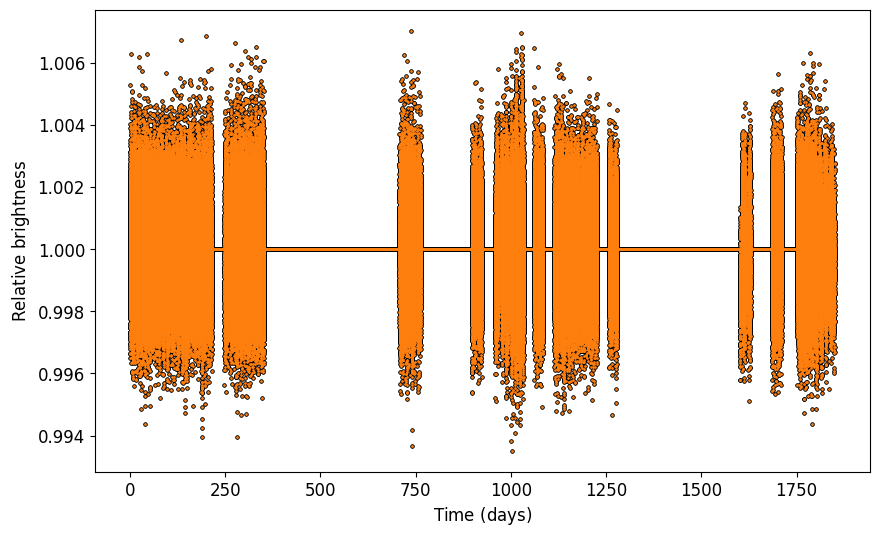

In [1]:
import coPsi
## Instantiate Data
dat = coPsi.Data()
## Read in data file
dat.readData('lc_toi1438.txt')
## Plot the data and return the axis
ax = dat.plotData(return_ax=1)

## Let's find the largest continuous chunk of data
## by default, this will be the maximum rotation period we'll search for
dat.maxTime()

## Fill the gaps (here for TESS downlink)
dat.fillGaps()
dat.plotData(ax=ax)

Now that we have a decent looking light curve, we'll try to estimate the stellar rotation period following the approach in [McQuillan et al. (2014)](https://ui.adsabs.harvard.edu/abs/2013MNRAS.432.1203M/abstract).

 Long gaps might make peaks appear far from any reasonable values.
Peaks found at:  [10.8597507  20.43477581 30.02230096 39.38204773 48.75012785 58.90293226
 69.37518194 78.87659575 88.97384445 97.76970086]
From median and MAD:
Prot = 9.5750+/-0.1064 d


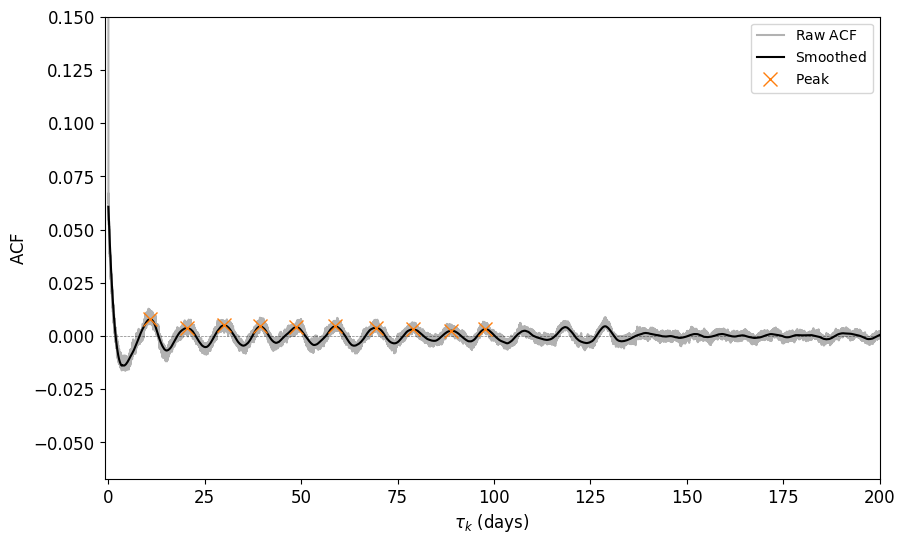

In [2]:

## Instantiate Rotator object, here it inherits from the Data attributes
rot = coPsi.Rotator(x=dat.x,y=dat.y)
## Calculate autocorrelation
rot.ACF()
## Smooth autocorrelation
rot.smoothACF(window=5001)
## Grab peaks and estimate rotation period
rot.fromPeaks(prominence=(0.001),xmin=-1,xmax=200,ymax=0.15)

That looks pretty good! But there seems to be a few more peaks we might want to consider.
We can do that manually by using `rot.pickPeaks`. 
However, we do need to have an interactive plot for that obviously.

In [3]:
%matplotlib qt
## Grab peaks manually and estimate rotation period
## Peaks are selected by clicking on the plot Mouse1 (event 1) to select, 
## Mouse3 (event 3) to deselect the latest peak, or Mouse2 (event 2) to remove all peaks
rot.pickPeaks(xmin=-1,xmax=200,ymax=0.15)

The animation below shows the procedure:
Use mouse1 (event 1) to select, mouse3 (event 3) to deselect the latest peak, or mouse2 (event 2) to remove all peaks

![SegmentLocal](peakSelect.gif "segment")


Then after selecting those peaks we can once again plot and fit the 1st order polynomium.

In [4]:
if len(rot.peaks) > 1:
	rot.fromPeaks(rot.peaks,plot=True,poly=True,xmin=-1,xmax=200,ymax=0.15)